In [101]:
def most_frequent(data):
    max = 0
    #print(data)
    
    for i in range(10):
        cnt = data.count(i)
        if cnt > max:
            max = cnt
            max_num = i
    
    return data.index(max_num)

In [102]:
def image_crop(file, image_width, image_height, cropped_width, cropped_height):
    cropped_images = []
    x = 0
    x_center = image_width // 2
    y_center = image_height // 2
    
    while x < image_width:
        y = 0
        while y < image_height:
            cropped_image = file[x : x + cropped_width, y : y + cropped_height]
            cropped_images.append(cropped_image)
            y += cropped_height
        x += cropped_width
    
    center_image = file[x_center - cropped_width // 2 : x_center + cropped_width // 2,
                       y_center - cropped_height // 2 : y_center + cropped_height // 2]
    
    cropped_images.append(center_image)
    
    return cropped_images

In [103]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [104]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

img_dir = './categorical_binary_cnn_by_majority/test'
categories = ['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N',
             'lotto_P', 'photoshop', 'non_ad']


image_width = 280 # 사이즈 수정
image_height = 280

X = []
X_original=[]
y = []
y_original=[]
y_bi = []
y_bi_original=[]
index = []
cat_index = []
files = []
filenames = []

for i, category in enumerate(categories):
    img_detail = os.path.join(img_dir, category)
    files.append(glob.glob(img_detail + "/*.jpg"))
    index.append(i)
 
    
for file, i in zip(files, index):
    for f in file:
        label = [0 for r in range(len(categories))]
        label[i] = 1
        
        img = data_generator(f, image_width, image_height)
        original_data = np.asarray(img)
        X_original.append(original_data)
        y_original.append(label)
        
        if i in range(9):
            y_bi_original.append(0)
        else:
            y_bi_original.append(1)
        
        cropped_images = image_crop(img, image_width, image_height, image_width // 2, image_height // 2)
        
        for cropped_image in cropped_images:
            data = np.asarray(cropped_image)

            head, tail = os.path.split(f)
            filenames.append(tail)

            X.append(data)
            y.append(label)

            if i in range(9):
                y_bi.append(0)
            else:
                y_bi.append(1)

    
X = np.array(X)
X_original = np.array(X_original)
y = np.array(y)
y_original = np.array(y_original)
y_bi = np.array(y_bi)
y_bi_original = np.array(y_bi_original)

X = X.astype('float32') / 255

print(len(X), len(y), len(y_bi))
print(len(X_original), len(y_original), len(y_bi_original))

"""인자 바꾸기"""



900 900 900
180 180 180


'인자 바꾸기'

In [105]:
def print_binary_scores(y_bi, binary_prediction):
    
    print('##################카테고리를 통한 이진 분류 결과 ##############')
    print('confusion matrix 결과')
    print(confusion_matrix(y_bi, binary_prediction, labels=[0, 1])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y_bi, binary_prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y_bi, binary_prediction, average=None) * 100)))

    #print('evaluate값')
    #print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y_bi, binary_prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y_bi, binary_prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y_bi, binary_prediction, average='macro') * 100))
    
    print('##################카테고리를 통한 이진 분류 결과 ##############')

In [106]:
def print_cat_scores(X, y, prediction):
    
    print('################## 다중 분류 결과 ###################')
    #print('confusion matrix 결과')
    #print(multilabel_confusion_matrix(y.argmax(axis=1), prediction, labels=[0 for r in range(12)])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y.argmax(axis=1), prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y.argmax(axis=1), prediction, average=None) * 100)))

    #print('evaluate값')
    #print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y.argmax(axis=1), prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y.argmax(axis=1), prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y.argmax(axis=1), prediction, average='macro') * 100))
    
    print('################## 다중 분류 결과 ###################')

In [112]:
import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
#image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
  #           190, 200, 210, 220, 230, 240, 256]

#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

#learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05]
#Dropout = [0.15]
#optimizer = ['adam', 'sgd', 'adagrad', 'rmsprop', 'nadam']
#epochs = [25, 30, 35, 40, 45, 50]

batch_list = [8, 16, 32, 64, 128]

model_evaluate = []
prediction = []

bi_f1 = []
bi_precision = []
bi_recall = []

cat_f1 = []
cat_precision = []
cat_recall = []



for batch in batch_list: #반복문 요소 바꾸기
    b_prediction = []
    binary_prediction = []
    ind = []
    
    
    model = load_model('./categorical_binary_cnn_by_majority/models/batch_size/categorical_binary_model_saved' + str(batch) + '.h5')
    
    ##############파일 인자 수정하기 ##############
    with K.tf_ops.device('/device:GPU:0'):
        prediction = model.predict(X)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
    
    count = []
    
    for p in prediction:
        is_ad = 0
        not_ad = 0
        amax = []
        
        count.append(p)

        if len(count) == 5:
            for c in count:
                amax.append(c.argmax())
                if c.argmax() in range(8):
                    is_ad += 1
                else:
                    not_ad +=1
                    
            if is_ad > not_ad:
                binary_prediction.append(0)
            else:
                binary_prediction.append(1)
            
            ind.append(most_frequent(amax))
            count = []  
            
        elif len(count) < 5:
            continue

    prediction = ind
    print(len(binary_prediction))
    print(len(prediction))
    
    print('예측값: ', prediction)
              
    print('배치 : ' + str(batch_list)) ####### 수정
    print_cat_scores(X_original, y_original, prediction)
    print_binary_scores(y_bi_original, binary_prediction)
    
    
    bi_precision.append(precision_score(y_bi_original, binary_prediction, average='macro') * 100)
    bi_recall.append(recall_score(y_bi_original, binary_prediction, average='macro') * 100)
    bi_f1.append(f1_score(y_bi_original, binary_prediction, average='macro') * 100)
    
    #model_evaluate.append(model.evaluate(X, y)[1] * 100)
    cat_precision.append(precision_score(y_original.argmax(axis=1), prediction, average='macro') * 100)
    cat_recall.append(recall_score(y_original.argmax(axis=1), prediction, average='macro') * 100)
    cat_f1.append(f1_score(y_original.argmax(axis=1), prediction, average='macro') * 100)

180
180
예측값:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
배치 : [8, 16, 32, 64, 128]
################## 다중 분류 결과 ###################
precision 개별값
['11.11%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
recall 개별값
['100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']
f1 점수
2.22%
precision 평균값
1.23%
recall 평균값
11.11%
################## 다중 분류 결과 ###################
##################카테고리를 통한 이진 분류 결과 ##############
confusion matrix 결과
[[  0 180]

'수정 필요한 부분'

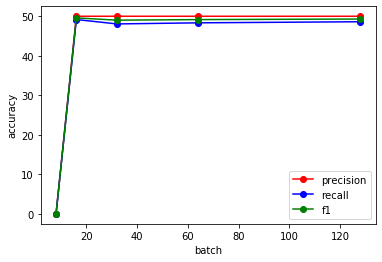

In [113]:
import matplotlib.pyplot as plt

"""이진 카테고리 분류"""

"""수정 필요한 부분"""

plt.plot(batch_list, bi_precision, 'ro-', label='precision') # 리스트 수정
plt.plot(batch_list, bi_recall, 'bo-', label='recall')
plt.plot(batch_list, bi_f1, 'go-', label='f1')
#plt.plot(optimizer, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('batch') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""

'수정 필요한 부분'

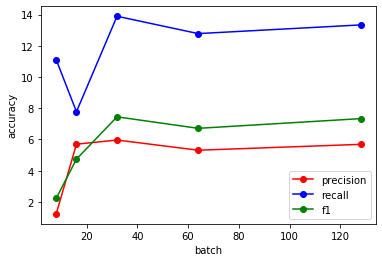

In [114]:
import matplotlib.pyplot as plt

"""카테고리 분류 """

"""수정 필요한 부분"""

plt.plot(batch_list, cat_precision, 'ro-', label='precision') # 리스트 수정
plt.plot(batch_list, cat_recall, 'bo-', label='recall')
plt.plot(batch_list, cat_f1, 'go-', label='f1')
#plt.plot(batch_list, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('batch') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""